In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall -y tensorflow tensorflow-text tf-keras keras
!pip install tensorflow==2.15.0 keras==2.15.0 tensorflow-addons==0.23.0 tensorflow-text==2.15.0 tf-keras==2.15.0


Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
import cv2
import os
import matplotlib.pyplot as plt
import datetime

/usr/local/lib/python3.11/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:


# loading all images
images = []
labels = []
root = '/content/drive/MyDrive/lungCancerDetectionData/dataset/merged'
for folder in os.listdir(root):
    for image in os.listdir(os.path.join(root, folder)):
        images.append(cv2.imread(os.path.join(root, folder, image)))
        labels.append(folder)

In [ ]:
y_normal = pd.DataFrame(labels)
y_normal[0].unique()
y = pd.get_dummies(y_normal)
y.head()

,0_Bengin cases,0_Malignant cases,0_Normal cases
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [ ]:
# verify sizes of all images.
resolution = set()
count = 0
for image in images:
    if image.shape != (512, 512, 3):
        resolution.add(image.shape)
        count += 1
print(str(resolution) + '\n' + f"Number of irregular images: {count}")

{(512, 801, 3), (512, 623, 3), (404, 511, 3), (331, 506, 3)}
Number of irregular images: 61


In [ ]:
filtimg = list()

for idx in range(len(images)):
    if images[idx].shape == (512, 512, 3):
        filtimg.append(images[idx])
    else:
        y.drop(idx, axis='rows', inplace=True)

if (len(images) - len(filtimg)) == 61:
    images = filtimg

In [ ]:
dataset = np.array(images)

dataset.shape[0] == y.shape[0]
y.shape

(1036, 3)

In [ ]:
num_classes = np.unique(y).shape[0]
input_shape = (512, 512, 3)

x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.25,
                                                    shuffle=True)

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (777, 512, 512, 3) - y_train shape: (777, 3)
x_test shape: (259, 512, 512, 3) - y_test shape: (259, 3)


In [ ]:
# testing for class names presence
class_names = train_ds.class_names
print(class_names)

AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 512, 512, 3)
(32,)


In [ ]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
  return ds

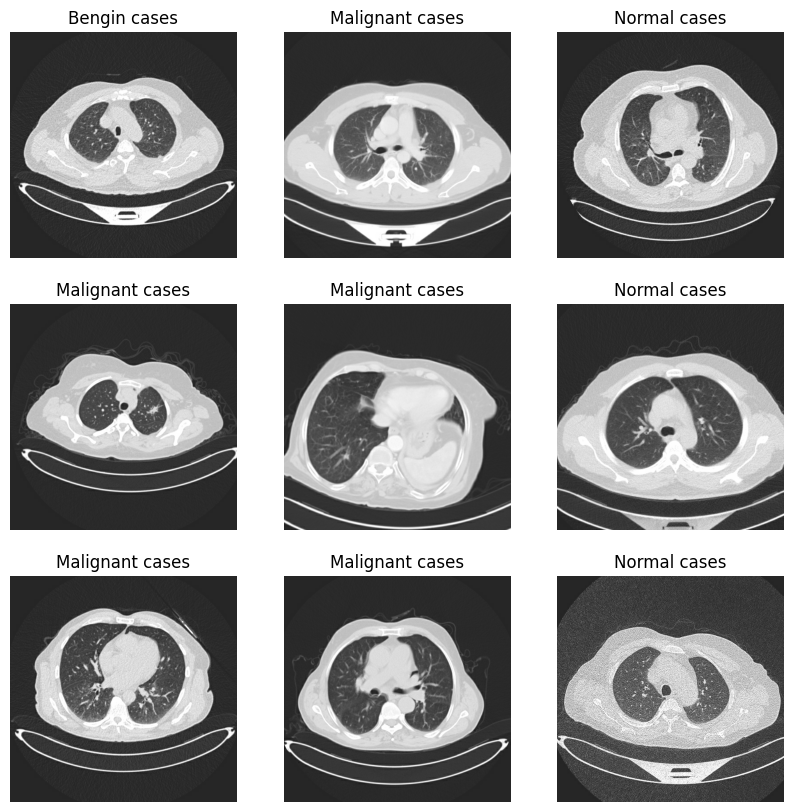

In [ ]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [ ]:
%reload_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache('/tmp/train_cache').shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache('/tmp/val_cache').prefetch(buffer_size=AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

image_height = 227
image_width = 227
batch_size = 16
num_classes = 3


train_ds = tf.keras.utils.image_dataset_from_directory(
    root,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    root,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


base_model = tf.keras.applications.MobileNetV2(
    input_shape=(image_height, image_width, 3),
    include_top=False,
    weights='imagenet')

base_model.trainable = False


model = models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


fit = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[tensorboard_callback]
)


Found 1097 files belonging to 3 classes.
Using 878 files for training.
Found 1097 files belonging to 3 classes.
Using 219 files for validation.


Epoch 1/10
55/55 [==============================] - 71s 1s/step - loss: 0.4366 - accuracy: 0.8235 - val_loss: 0.3559 - val_accuracy: 0.8630
Epoch 2/10
55/55 [==============================] - 66s 1s/step - loss: 0.2975 - accuracy: 0.8770 - val_loss: 0.3142 - val_accuracy: 0.8858
Epoch 3/10
55/55 [==============================] - 65s 1s/step - loss: 0.2113 - accuracy: 0.9134 - val_loss: 0.2517 - val_accuracy: 0.8858
Epoch 4/10
55/55 [==============================] - 61s 1s/step - loss: 0.2058 - accuracy: 0.9157 - val_loss: 0.2219 - val_accuracy: 0.9132
Epoch 5/10
55/55 [==============================] - 61s 1s/step - loss: 0.1567 - accuracy: 0.9362 - val_loss: 0.2824 - val_accuracy: 0.8995
Epoch 6/10
55/55 [==============================] - 62s 1s/step - loss: 0.1250 - accuracy: 0.9476 - val_loss: 0.1892 - val_accuracy: 0.9224
Epoch 7/10
55/55 [==============================] - 63s 1s/step - loss: 0.1016 - accuracy: 0.9647 - val_loss: 0.1907 - val_accuracy: 0.9132
Epoch 8/10
55/55 [==

In [ ]:
model.save("mobilenetv2_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


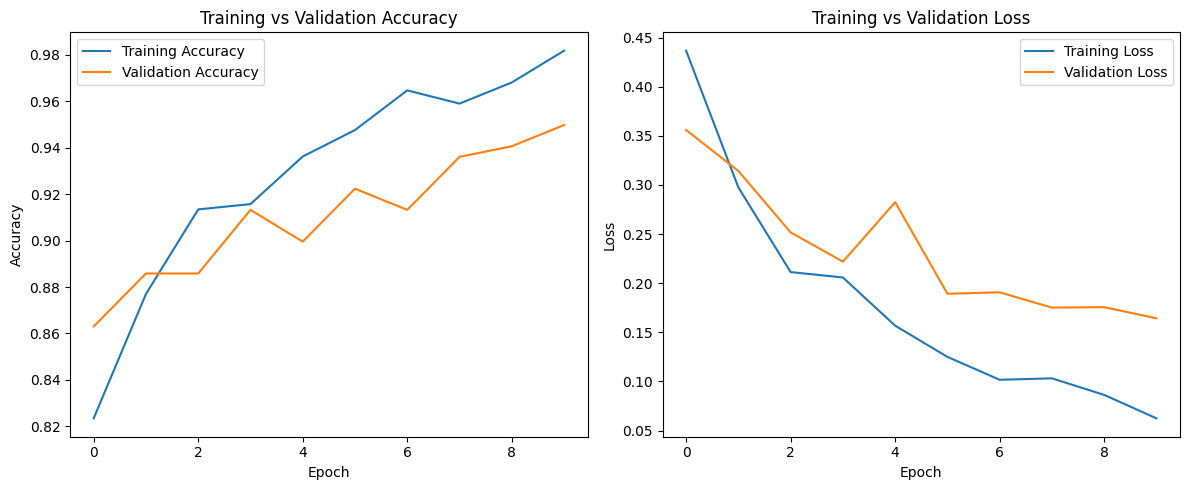

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    root,
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False)

test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

test_loss, test_acc = model.evaluate(test_ds)


Found 1097 files belonging to 3 classes.
69/69 [==============================] - 62s 894ms/step - loss: 0.0615 - accuracy: 0.9854


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Get true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Get predicted probabilities
y_pred_probs = model.predict(test_ds)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)


69/69 [==============================] - 63s 900ms/step


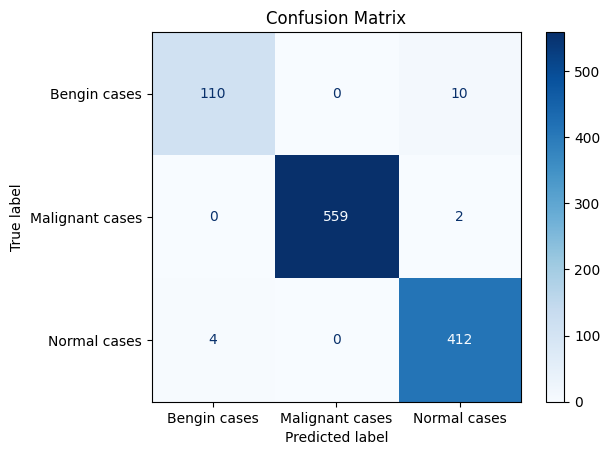

In [ ]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
                  precision    recall  f1-score   support

   Bengin cases       0.96      0.92      0.94       120
Malignant cases       1.00      1.00      1.00       561
   Normal cases       0.97      0.99      0.98       416

       accuracy                           0.99      1097
      macro avg       0.98      0.97      0.97      1097
   weighted avg       0.99      0.99      0.99      1097



In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print(metrics_df)


             Class  Precision    Recall  F1-Score
0     Bengin cases   0.964912  0.916667  0.940171
1  Malignant cases   1.000000  0.996435  0.998214
2     Normal cases   0.971698  0.990385  0.980952


In [ ]:
import pandas as pd

# Final epoch metrics
final_train_acc = fit.history['accuracy'][-1]
final_val_acc = fit.history['val_accuracy'][-1]
final_train_loss = fit.history['loss'][-1]
final_val_loss = fit.history['val_loss'][-1]

data = {
    'Dataset': ['Training', 'Validation', 'Test'],
    'Accuracy': [final_train_acc, final_val_acc, test_acc],
    'Loss': [final_train_loss, final_val_loss, test_loss]
}

df = pd.DataFrame(data)
print(df)


      Dataset  Accuracy      Loss
0    Training  0.981777  0.062390
1  Validation  0.949772  0.164198
2        Test  0.985415  0.061485


In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(
    input_shape=(image_height, image_width, 3),
    include_top=False,
    weights='imagenet')

base_model.trainable = False

model_resnet = models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_resnet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

fit_resnet = model_resnet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[tensorboard_callback])


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
55/55 [==============================] - 249s 4s/step - loss: 1.0270 - accuracy: 0.4738 - val_loss: 0.9419 - val_accuracy: 0.5434
Epoch 2/10
55/55 [==============================] - 241s 4s/step - loss: 0.9458 - accuracy: 0.5524 - val_loss: 0.9309 - val_accuracy: 0.5434
Epoch 3/10
55/55 [==============================] - 240s 4s/step - loss: 0.9216 - accuracy: 0.5524 - val_loss: 0.9141 - val_accuracy: 0.5434
Epoch 4/10
55/55 [==============================] - 239s 4s/step - loss: 0.9127 - accuracy: 0.5456 - val_loss: 0.9085 - val_accuracy: 0.5434
Epoch 5/10
55/55 [==============================] - 239s 4s/step - loss: 0.9056 - accuracy: 0.5490 - val_loss: 0.8769 - val_accuracy: 0.5434
Epoch 6/10
55/55 [==============================] - 239s 4s/step - loss: 0.8972 - accuracy: 0.5524 - val_loss: 0.8722 - val_accuracy: 0.5434
Epoch 7/10
55/55 [==============================] - 238s 4s/step - loss: 0.8834 - accurac

In [ ]:
model.save("Resnet_model.h5")  # This saves a folder, not .h5


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import shutil

shutil.make_archive('Resnet_model', 'zip', 'Resnet_model')
from google.colab import files

files.download('Resnet_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam

image_height = 224
image_width = 224

# Load the EfficientNetB0 base
base_model = EfficientNetB0(
    input_shape=(image_height, image_width, 3),
    include_top=False,
    weights='imagenet')

base_model.trainable = False  # Freeze for initial training

# Build the model
model_efficientnet = models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile and train initially
model_efficientnet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

fit_effnet = model_efficientnet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[tensorboard_callback])

# ----------------------------
# FINE-TUNING BELOW
# ----------------------------

# Unfreeze the base model
base_model.trainable = True

# Optionally freeze early layers (first ~100 to keep low-level features stable)
for layer in base_model.layers[:100]:
    layer.trainable = False

# Recompile with a lower learning rate
model_efficientnet.compile(
    optimizer=Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# Continue training (fine-tuning)
fit_effnet_finetuned = model_efficientnet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,  # You can increase
    callbacks=[tensorboard_callback])


16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/10
55/55 [==============================] - 128s 2s/step - loss: 0.9962 - accuracy: 0.4624 - val_loss: 0.9496 - val_accuracy: 0.5434
Epoch 2/10
55/55 [==============================] - 116s 2s/step - loss: 0.9783 - accuracy: 0.4863 - val_loss: 0.9492 - val_accuracy: 0.5434
Epoch 3/10
55/55 [==============================] - 116s 2s/step - loss: 0.9747 - accuracy: 0.4852 - val_loss: 0.9499 - val_accuracy: 0.5434
Epoch 4/10
55/55 [==============================] - 113s 2s/step - loss: 0.9726 - accuracy: 0.4852 - val_loss: 0.9517 - val_accuracy: 0.5434
Epoch 5/10
55/55 [==============================] - 117s 2s/step - loss: 0.9659 - accuracy: 0.5046 - val_loss: 0.9554 - val_accuracy: 0.5434
Epoch 6/10
55/55 [==============================] - 113s 2s/step - loss: 0.9645 - accuracy: 0.5057 - val_loss: 0.9531 - val_accuracy: 0.5434
Epoch 7/10
55/55 [==============================] - 115s 2s/step - loss: 0.9680 - accurac

In [ ]:
model.save("EfficientNetB0_model.h5")